# Домашнее задание по теме:

## Подготовка окружения

In [1]:
# ВНИМАНИЕ: необходимо удостовериться, что виртуальная среда выбрана правильно!

# Для MacOS/Ubuntu
# !which pip

# Для Windows
# !where pip

In [2]:
# !conda install pandas matplotlib numpy seaborn -y

In [3]:
import numpy as np

np.__version__

'1.19.2'

In [4]:
import pandas as pd

pd.__version__

'1.2.3'

In [5]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.__version__

'3.3.4'

In [6]:
import seaborn as sns

sns.__version__

'0.11.1'

## Загрузка данных

[Источник (Hotel booking demand)](https://www.kaggle.com/jessemostipak/hotel-booking-demand)

[Описание колонок](https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005)

ВНИМАНИЕ: Предварительно датасет необходимо скачать к себе на локальный компьютер.

In [7]:
# загрузить датасет в pandas dataframe
df = pd.read_csv("./../../data/hotel_bookings.csv")

# показать все колонки
pd.options.display.max_columns = None

# вывести первые 5 и последние 5 строк
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


## **ВНИМАНИЕ**

- В ячейках с комментариями необходимо реализовать то, что описывает комментарий.

- Можно выполнить это задание для любого количества колонок, необходимый минимум указан в задании (две конкретные колонки).

- Для выполнения заданий можно использовать любые удобные способы.

- Можно и нужно использовать вспомогательные функции из лекции, но желательно привнести в них что-то от себя. Например, изменить цвет, размер, расположение графиков и т.п. Приветствуются любые изменения.

## Выбор колонок для изучения

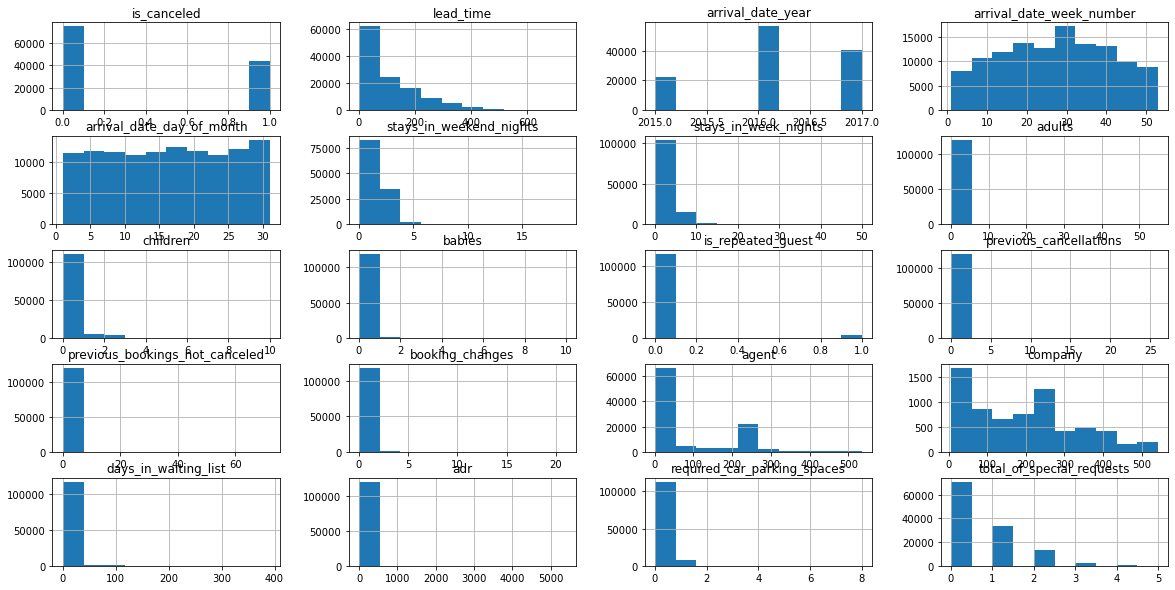

In [8]:
# нарисовать гистограммы для всех числовых колонок
_ = df.hist(figsize=(20, 10))

In [9]:
# выбрать колонки arrival_date_week_number и lead_time
ex_col_names = ['arrival_date_week_number', 'lead_time']

In [10]:
def ex_col_names_with_suffix(suffix):
    return [f"{name}_{suffix}" for name in ex_col_names]

## Удаление выбросов

In [11]:
# функция для удаления выбросов
def remove_outliers_iqr(data, col_name):
    print(f"column name: {col_name}\n")
    Q1 = data[col_name].quantile(0.25)
    Q3 = data[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    data_new = data[~((data[col_name] < lower_fence) |
                      (data[col_name] > upper_fence))]
    
    diff_len = len(data) - len(data_new)
    print(f"removed: {diff_len}")
    
    _, axs = plt.subplots(2, 1, figsize=(6, 6))
    sns.boxplot(data=data_new[col_name], ax=axs[0])
    sns.histplot(data=data_new[col_name], ax=axs[1])   
    
    return data_new.reset_index(drop=True)

column name: arrival_date_week_number

removed: 0


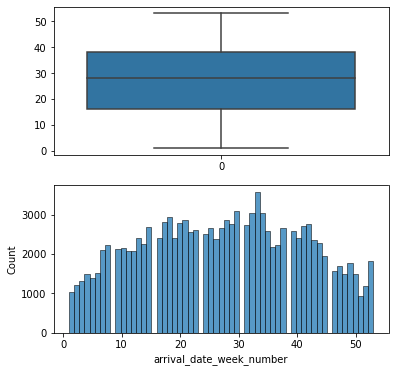

In [12]:
df = remove_outliers_iqr(df, ex_col_names[0])

column name: lead_time

removed: 3005


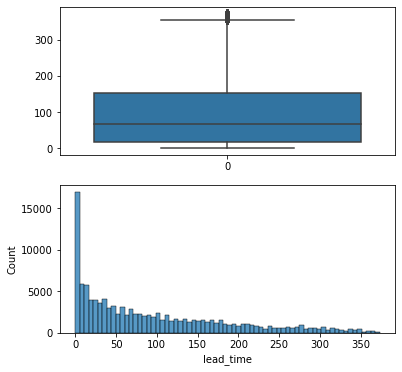

In [13]:
df = remove_outliers_iqr(df, ex_col_names[1])

In [14]:
def plot_sep_hist_box(col_names):
    _, axes = plt.subplots(2, 2, figsize=(16, 6))

    sns.histplot(df[col_names[0]], 
                 ax=axes[0][0], 
                 color='m', 
                 kde=True)
    
    sns.boxplot(data=df[col_names[0]], 
                ax=axes[1][0], 
                color='m')

    sns.histplot(df[col_names[1]], 
                 ax=axes[0][1], 
                 color='b', 
                 kde=True)
    
    sns.boxplot(data=df[col_names[1]], 
                ax=axes[1][1], 
                color='b', 
                saturation=0.7)

In [15]:
def plot_hist_box(col_names):
    _, axes = plt.subplots(1, 2, figsize=(16, 4))

    sns.histplot(df[col_names], 
                 palette=['m', 'b'], 
                 ax=axes[0], 
                 legend=False, 
                 kde=True)

    bp = sns.boxplot(data=df[col_names], 
                     palette=['m', 'b'], 
                     ax=axes[1], 
                     saturation=0.7)
    bp.set_xticklabels(bp.get_xticklabels(),
                       rotation=45)

In [16]:
def plot_hist_original_new(col_names_original, col_names_new):
    _, axes = plt.subplots(2, 2, figsize=(16, 4))

    sns.histplot(df[col_names_original[0]], 
                 color='m', 
                 ax=axes[0][0], 
                 legend=False, 
                 kde=True)
    
    sns.histplot(df[col_names_new[0]], 
                 color='m', 
                 ax=axes[0][1], 
                 legend=False, 
                 kde=True)
    
    sns.histplot(df[col_names_original[1]], 
                 color='b', 
                 ax=axes[1][0], 
                 legend=False, 
                 kde=True)
    
    sns.histplot(df[col_names_new[1]], 
                 color='b', 
                 ax=axes[1][1], 
                 legend=False, 
                 kde=True)

## Нормализация

### Минимаксная нормализация (`MinMaxScaler`)

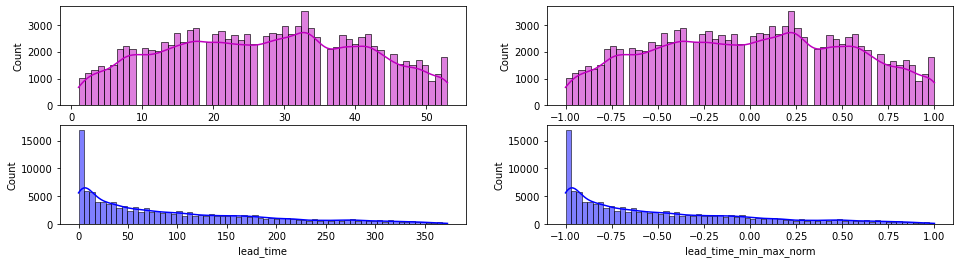

In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

ex_col_names_min_max_norm = ex_col_names_with_suffix('min_max_norm')

df[ex_col_names_min_max_norm] = min_max_scaler.fit_transform(df[ex_col_names])

plot_hist_original_new(ex_col_names, ex_col_names_min_max_norm)

### Robust scaling

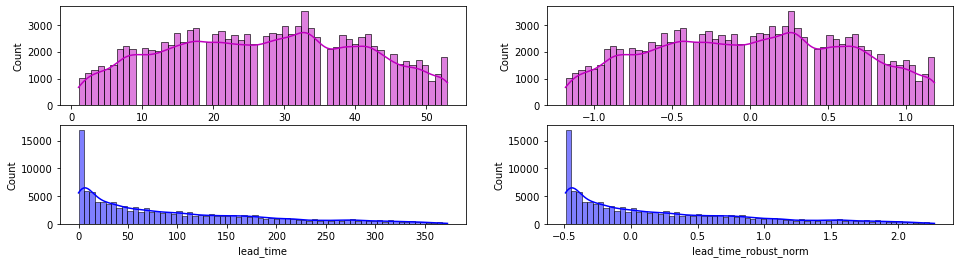

In [18]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

ex_col_names_robust_norm = ex_col_names_with_suffix('robust_norm')

df[ex_col_names_robust_norm] = robust_scaler.fit_transform(df[ex_col_names])

plot_hist_original_new(ex_col_names, ex_col_names_robust_norm)

## Стандартизация

In [19]:
from scipy.stats import shapiro, normaltest, chisquare, jarque_bera, kstest

test_funcs = {'shapiro': shapiro,
              'normaltest': normaltest,
              'chisquare': chisquare,
              'jarque_bera': jarque_bera,
              'kstest': kstest}

def norm_tests(col_names):
    for col_name in col_names:
        print(f'*' * 20)
        print(f"column name: {col_name}")
        for test_name, test_func in test_funcs.items():
            
            print(f"\ttest name: {test_name}")
            stat, p = shapiro(df[col_name])
            print(f"\tstat = {stat}\n\tp = {p}")

            if p > 0.05:
                print('\tProbably GAUSSIAN')
            else:
                print('\tProbably NOT Gaussian')
            print(f"\t{'-' * 20}")

### Log Transformation

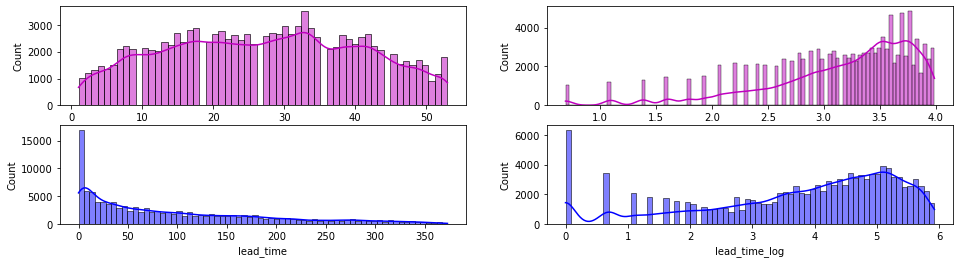

In [20]:
ex_col_names_log = ex_col_names_with_suffix('log')

df[ex_col_names_log] = np.log1p(df[ex_col_names])

plot_hist_original_new(ex_col_names, ex_col_names_log)

In [21]:
norm_tests(ex_col_names_log)

********************
column name: arrival_date_week_number_log
	test name: shapiro
	stat = 0.8920623064041138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: normaltest
	stat = 0.8920623064041138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: chisquare
	stat = 0.8920623064041138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: jarque_bera
	stat = 0.8920623064041138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: kstest
	stat = 0.8920623064041138
	p = 0.0
	Probably NOT Gaussian
	--------------------
********************
column name: lead_time_log
	test name: shapiro
	stat = 0.9067067503929138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: normaltest
	stat = 0.9067067503929138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: chisquare
	stat = 0.9067067503929138
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: jarque_bera
	stat = 0.9067067503929138
	p = 0.0
	Probabl

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Квантильный преобразователь (`QuantileTransformer`)

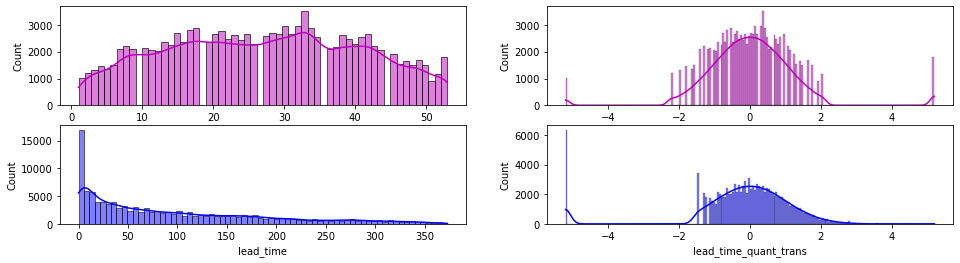

In [22]:
from sklearn.preprocessing import QuantileTransformer

quant_trans = QuantileTransformer(output_distribution='normal')
ex_col_names_quant_trans = ex_col_names_with_suffix('quant_trans')
df[ex_col_names_quant_trans] = quant_trans.fit_transform(df[ex_col_names])
plot_hist_original_new(ex_col_names, ex_col_names_quant_trans)

In [23]:
norm_tests(ex_col_names_quant_trans)

********************
column name: arrival_date_week_number_quant_trans
	test name: shapiro
	stat = 0.9037194848060608
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: normaltest
	stat = 0.9037194848060608
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: chisquare
	stat = 0.9037194848060608
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: jarque_bera
	stat = 0.9037194848060608
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: kstest
	stat = 0.9037194848060608
	p = 0.0
	Probably NOT Gaussian
	--------------------
********************
column name: lead_time_quant_trans
	test name: shapiro
	stat = 0.8153383135795593
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: normaltest
	stat = 0.8153383135795593
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: chisquare
	stat = 0.8153383135795593
	p = 0.0
	Probably NOT Gaussian
	--------------------
	test name: jarque_bera
	stat = 0.8153383135795593
	

/home/ira/anaconda3/envs/LevelUp_DataScience/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
